# 1.Open and display the image “dog.jpeg”. Convert the image in to numpy array, so that i can be used in further processing

In [20]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install opencv-python

In [55]:
from PIL import Image
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

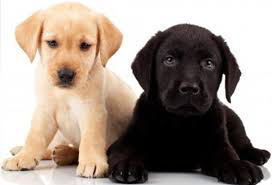

In [33]:
img = Image.open('dogs.jpeg')
img

In [11]:
arr = np.array(img)

# 2. Find out the dimensions of the image and convert it in to a two-dimensional array.

In [14]:
img_size = np.array(img.size)
img_size

array([272, 185])

# 3.Use kmeans clustering with k set to 3 and cluster the image.

In [49]:
# Reshape the array in 2 dimensions
flat_array = arr.ravel()
array1 = flat_array.reshape(arr.shape[0] * arr.shape[1], arr.shape[2])

In [50]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(array1)

KMeans(n_clusters=3)

In [51]:
print(kmeans.cluster_centers_)

[[210.72805297 174.97024685 143.8803335 ]
 [ 29.53151823  21.59559346  20.4844459 ]
 [251.51851478 247.7483708  243.25546855]]


In [52]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 12228, 1: 18293, 2: 19799}


In [65]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    arr.shape[0], arr.shape[1], arr.shape[2])

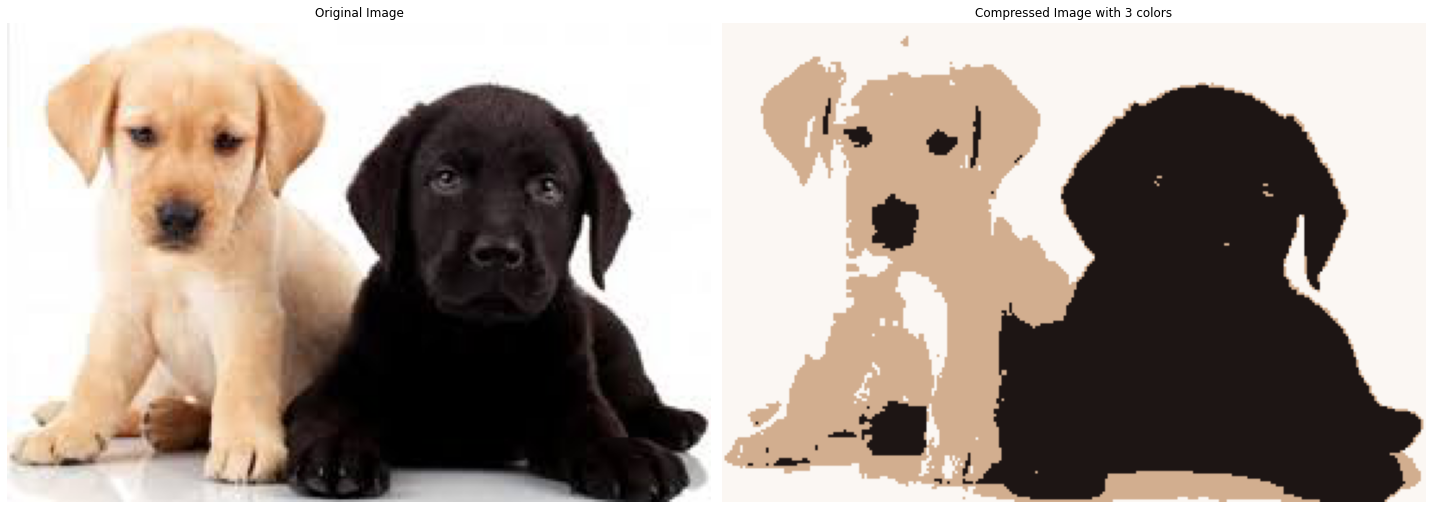

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

# 4. Predict the cluster label of every pixel in the image and plot it back as an image.

In [63]:
df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())

   col1  col2  col3  cluster
0   240   240   240        2
1   255   255   255        2
2   255   255   255        2
3   251   251   251        2
4   255   255   255        2


E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\MachineLearning\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


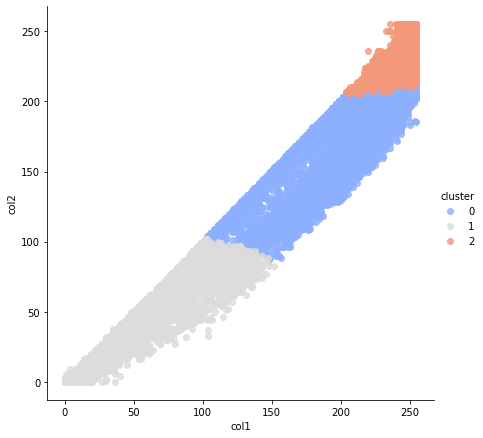

In [66]:
# Plot cluster points
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False)

# 5. Find out the three dominant color in the image.
[Hint: The cluster centers should correspond to three dominant colors]

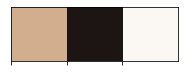

In [62]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()